In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv("Walmart_Store_sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [2]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


### Which store has maximum sales

In [3]:
data = df[['Store', 'Weekly_Sales']].groupby('Store').sum().sort_values(['Weekly_Sales'], ascending=False)
data.iloc[0:1]

,Weekly_Sales
Store,
20,3.013978e+08


### Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [4]:
data.std()

Weekly_Sales    7.816756e+07
dtype: float64

### Mean of Sales

In [5]:
data.mean()

Weekly_Sales    1.497160e+08
dtype: float64

### Which store/s has good quarterly growth rate in Q3’2012

In [6]:
df['Year'] = df['Date'].dt.year

In [7]:
def quarterData(month):
    if month <= 3:
        return 'Q1'
    elif month > 3 and month <= 6:
        return 'Q2'
    elif month > 6 and month <= 9:
        return 'Q3'
    else:
        return 'Q4'
    
df['Quarter'] = df['Date'].dt.month.apply(quarterData)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,Q2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,Q4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,Q1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,Q1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,Q2


In [8]:
quarter_value = df[(df['Quarter'] == 'Q3') & (df['Year'] == 2012)].groupby('Store')['Weekly_Sales'].sum()
print(quarter_value)

Store
1     18633209.98
2     22396867.61
3      4966495.93
4     25652119.35
5      3880621.88
6     18341221.11
7      7322393.92
8     10873860.34
9      6528239.56
10    21169356.45
11    16094363.07
12    11777508.50
13    24319994.35
14    20140430.40
15     6909374.37
16     6441311.11
17    11533998.38
18    12507521.72
19    16644341.31
20    24665938.11
21     8403507.99
22    11818544.33
23    17103654.36
24    16125999.86
25     8309440.44
26    12417575.35
27    20191238.11
28    15055659.67
29     6127862.07
30     5181974.44
31    16454328.46
32    14142164.84
33     3177072.43
34    11476258.98
35    10252122.68
36     3578123.58
37     6250524.08
38     5129297.64
39    18899955.17
40    11647661.37
41    16373588.44
42     6830839.86
43     7376726.03
44     4020486.01
45     8851242.32
Name: Weekly_Sales, dtype: float64


In [9]:
print("Store {} has good quarterly growth rate in Q3-2012 {}".format(quarter_value.idxmax(),quarter_value.max()))

Store 4 has good quarterly growth rate in Q3-2012 25652119.35


### Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

### Provide a monthly and semester view of sales in units and give insights

In [10]:
df['Month'] = df['Date'].dt.month
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,Q2,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,Q4,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,Q1,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,Q1,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,Q2,5


In [11]:
monthly_view_data = df[['Year', 'Month', 'Weekly_Sales']].groupby(['Year', 'Month']).sum()
print(monthly_view_data)

            Weekly_Sales
Year Month              
2010 1      4.223988e+07
     2      1.915869e+08
     3      1.862262e+08
     4      1.838118e+08
     5      2.806119e+08
     6      1.424361e+08
     7      1.842664e+08
     8      1.845381e+08
     9      1.797041e+08
     10     2.311201e+08
     11     1.587731e+08
     12     3.235716e+08
2011 1      2.119657e+08
     2      1.876092e+08
     3      1.365205e+08
     4      2.789693e+08
     5      1.828017e+08
     6      1.401936e+08
     7      2.244611e+08
     8      1.880810e+08
     9      2.310323e+08
     10     1.837193e+08
     11     2.534703e+08
     12     2.293760e+08
2012 1      1.722207e+08
     2      1.428296e+08
     3      2.307397e+08
     4      1.825428e+08
     5      1.422830e+08
     6      2.923883e+08
     7      1.845865e+08
     8      1.916126e+08
     9      1.797959e+08
     10     1.880794e+08
     11     4.692588e+07
     12     4.612851e+07


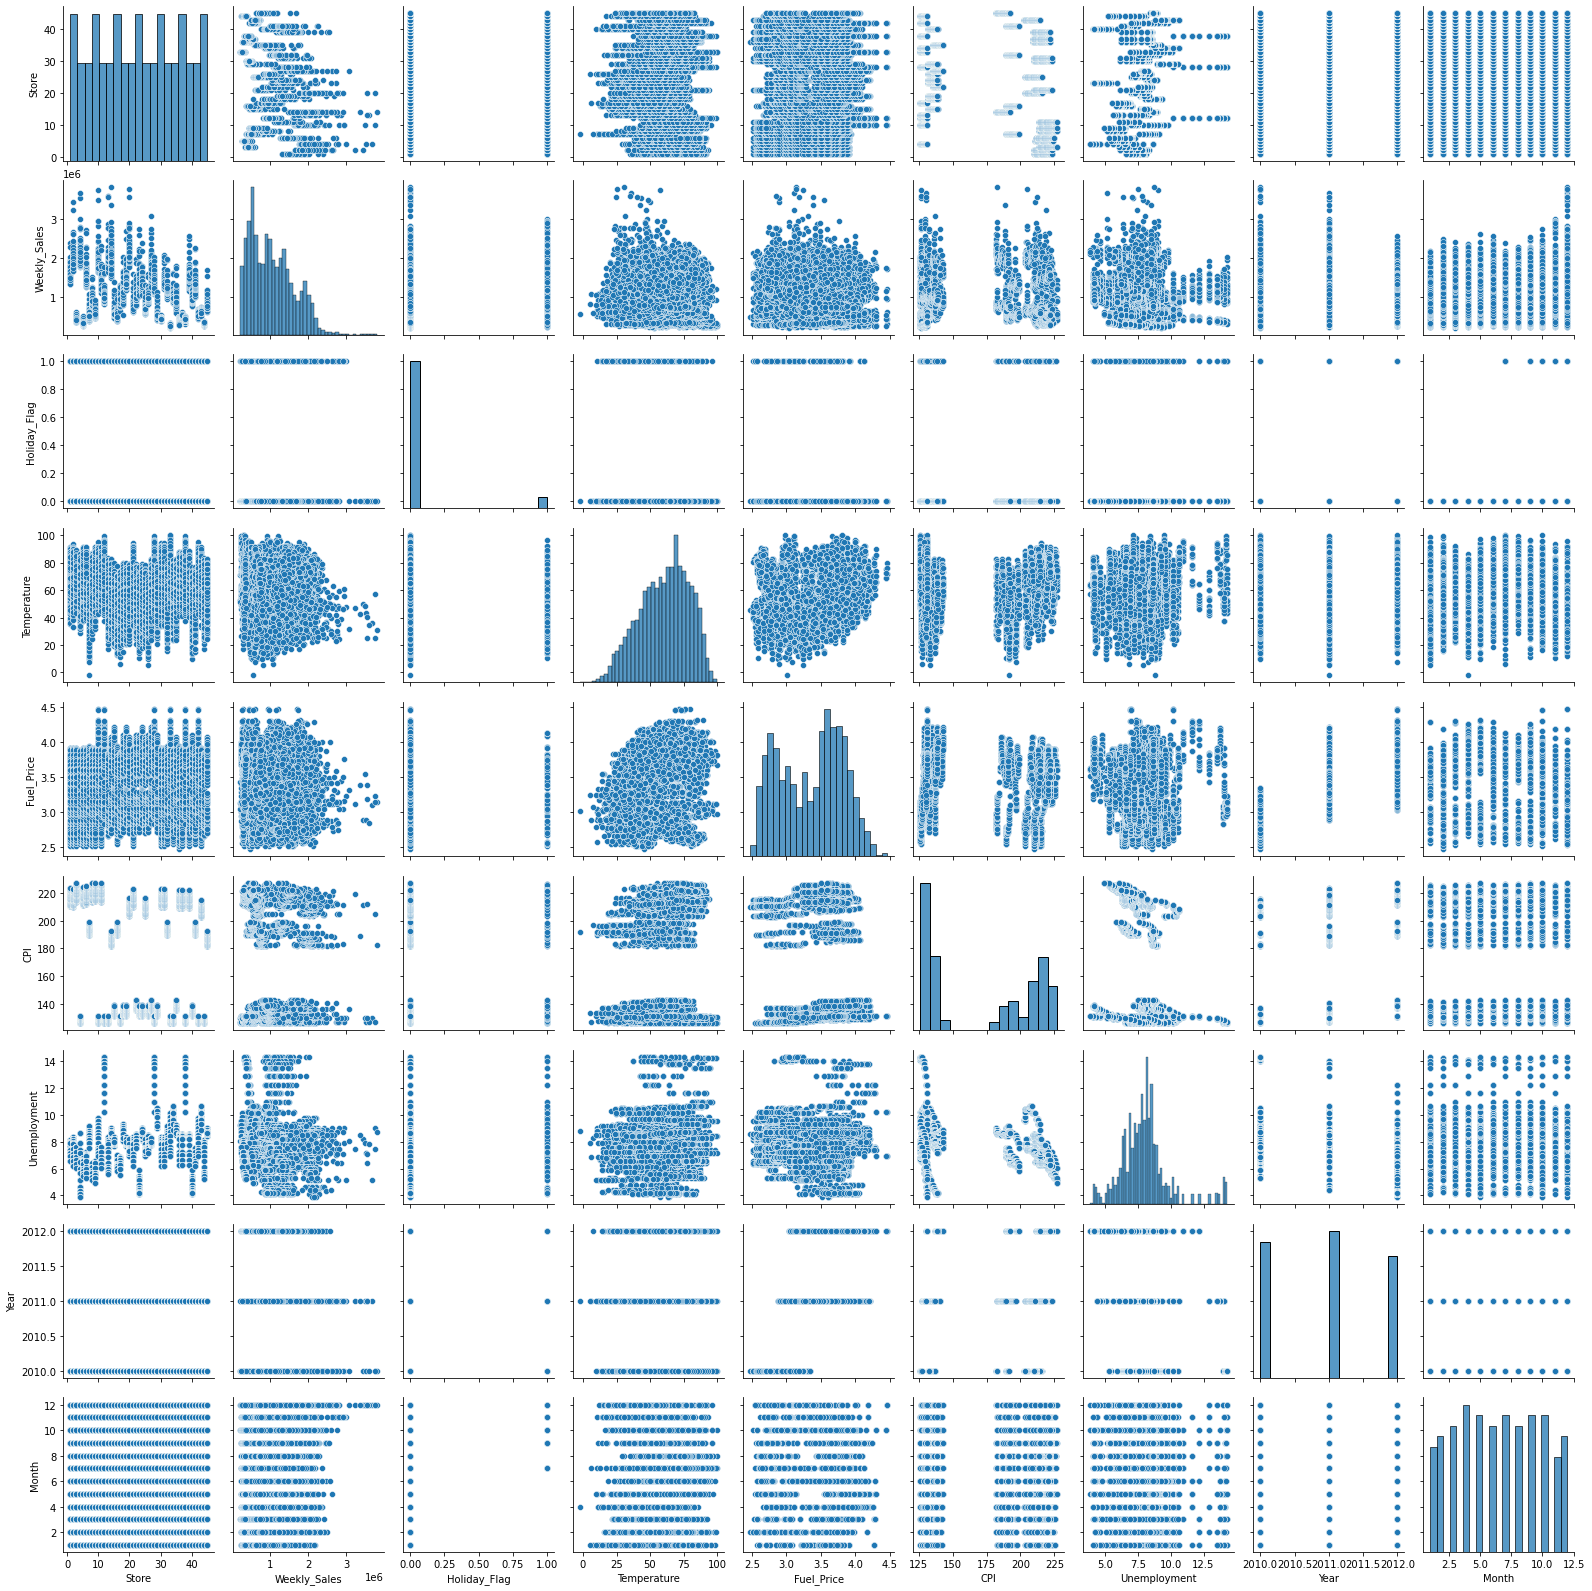

In [13]:
sns.pairplot(df)

## For Store 1 – Build  prediction models to forecast demand

#### 1. Linear Regression :– Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales. <br> 2. Change dates into days by creating new variable.

### Select the model which gives best accuracy.